#Вариант 14
Кривенцова Л.С. 0382

In [ ]:
install.packages("e1071", dep = TRUE, type = "source")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’




### Результаты статистического эксперимента приведены в таблице 1. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$.

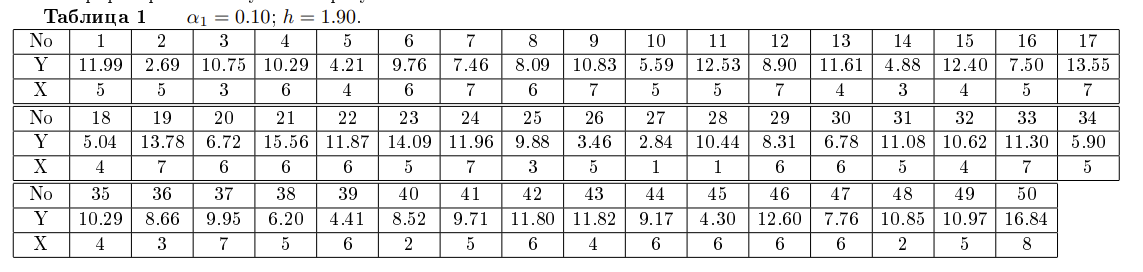

#### 1. Построить графически результаты эксперимента. СФормулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки. 


 $Y$ и $x$ - векторы данных.  
 Рассмотрим зависимость $Y$ от $x$. Для этого выведем график результата эксперимента методом $plot(x, Y)$.

Рассмотрим линейную регрессионую модель $Y$ по $x$:<br>

Оценим среднее (распредление $Y$ от $x$): 

$$\displaystyle 𝔼_\theta(Y|x) = X^T(x)\beta\ и\ 𝔻(Y|x) = \sigma^2\ <=>\ Y = X^T(x)\beta +\varepsilon,\ \varepsilon \sim 𝒩(0, \sigma^2)$$

$$\begin{matrix}
\displaystyle Y_1 = \beta_0+\beta_1x_1 + \varepsilon_1;\\
\displaystyle Y_2 = \beta_0+\beta_1x_2 + \varepsilon_2;\\
...\\
\displaystyle Y_n = \beta_0+\beta_1x_n + \varepsilon_n
\end{matrix} <=>
\begin{pmatrix}
Y_1\\
Y_2\\
\vdots\\
Y_n
\end{pmatrix} = \begin{pmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots\\
1 & x_n
\end{pmatrix} \begin{pmatrix}
\beta_0\\
\beta_1
\end{pmatrix} + \begin{pmatrix}
\varepsilon_1\\
\varepsilon_2\\
\vdots\\
\varepsilon_n
\end{pmatrix},\\где\ X = \begin{pmatrix}
1 & 1 & \cdots & 1\\
x_1 & x_2 & \cdots & x_n
\end{pmatrix} - матрица\ регрессоров.$$

Чтобы создать матрицу регрессоров к вектору $x$ добавим колонку "1" и протранспонируем, получив матрицу $X$.

Чтобы создать линейную модель воспользуемся методом $lm(Y \sim x)$

Построим МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.

Оценка по МНК для параметров необходима, чтобы оценить, гасколько коварианты оказывают влияние на рассматриваемую случ.величину: 

$$\hat \beta = (XX^T)^{-1}XY$$

Подставим полученные значения $\hat \beta_0, \hat \beta_1$.


Вывод: была построена линия регрессии.


beta0, beta1:



Call:
lm(formula = Y ~ x)

Coefficients:
(Intercept)            x  
     6.5245       0.5523  



beta0, beta1, построенные с помощью оценки по МНК:


,6.524455
x,0.552312


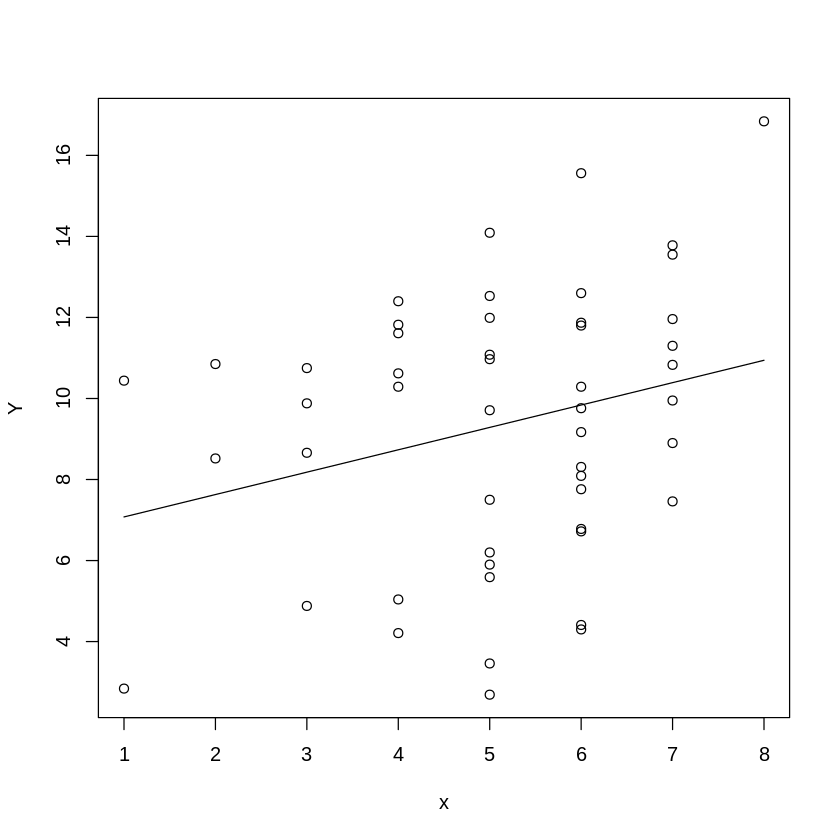

In [ ]:
Y <- c(11.99, 2.69, 10.75, 10.29, 4.21, 9.76, 7.46, 8.09, 10.83, 5.59, 12.53, 8.90, 11.61, 4.88, 12.40, 7.50, 13.55, 5.04, 13.78, 6.72, 15.56, 11.87, 14.09, 11.96, 9.88, 3.46, 2.84, 10.44, 8.31, 6.78, 11.08, 10.62, 11.30, 5.90, 10.29, 8.66, 9.95, 6.20, 4.41, 8.52, 9.71, 11.80 ,11.82, 9.17, 4.30, 12.60, 7.76, 10.85, 10.97, 16.84)
x <- c(5, 5, 3, 6, 4, 6, 7, 6, 7, 5, 5, 7, 4, 3, 4, 5, 7, 4, 7, 6, 6, 6, 5, 7, 3, 5, 1, 1, 6, 6, 5, 4, 7, 5, 4, 3, 7, 5, 6, 2, 5, 6, 4, 6, 6, 6, 6, 2, 5, 8)
n <- 50
plot(x, Y)
X <- t(cbind(1,x))
model <- lm(Y ~ x)
cat("beta0, beta1:\n")
model
beta.hat <- solve(X %*% t(X)) %*% X %*% Y
cat("\nbeta0, beta1, obtained through evaluation by Least Square Method:\n")
beta.hat
Y.pred <- beta.hat[1] + beta.hat[2]*x
lines(x, Y.pred)

***Выводы:***
Так как значения $\beta_0\ и\ \beta_1$, полученные с помощью вычислительной функции и с помощью оценки по МНК совпадают, следовательно, оценка подобрана хорошо. Из графика видно, что при любом  $x_i$ соответствующее значение $Y_i$ приблизительно является средним. Следовательно, модель линейной регрессии построена хорошо.


#### 2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Вектор ошибок находится по формуле:<br> $$\displaystyle \varepsilon = Y - X^T(x)\hat \beta = \sum_{i=1}^n (Y_i-\hat\beta_0-\hat\beta_1x_i)$$

Несмещенная оценка дисперсии: $$\displaystyle \hat {\sigma^2} = S^2 = \frac 1 {n-r} \left\| Y-X^T(x) \hat\beta \right\| = \frac 1 {n-r} \sum_{i=1}^n (Y_i-\hat\beta_0-\hat\beta_1x_i)^2$$, $n$ - длина вектора $Y$, $r$ - число параметров регрессии ($r=2$).

Построим гистограмму (шаг = 1.90) на базе вектора ошибок.



Fault vector:
 -6.596015 -5.826015 -5.538327 -5.428327 -4.523703 -4.236767 -3.696015 -3.693703 -3.386015 -3.301391 -3.118327 -3.086015 -3.058327 -2.930639 -2.078327 -1.786015 -1.748327 -1.528327 -1.490639 -0.6683271 -0.4406391 -0.07832707 0.423985 0.4393609 0.4516729 0.478609 0.8909211 0.9093609 1.556297 1.569361 1.683985 1.698609 1.793985 1.886297 1.961673 2.031673 2.568609 2.703985 2.761673 2.876297 3.086297 3.159361 3.220921 3.243985 3.363233 3.389361 3.666297 4.803985 5.721673 5.897049

Unbiased estimator of variance: 10.48881

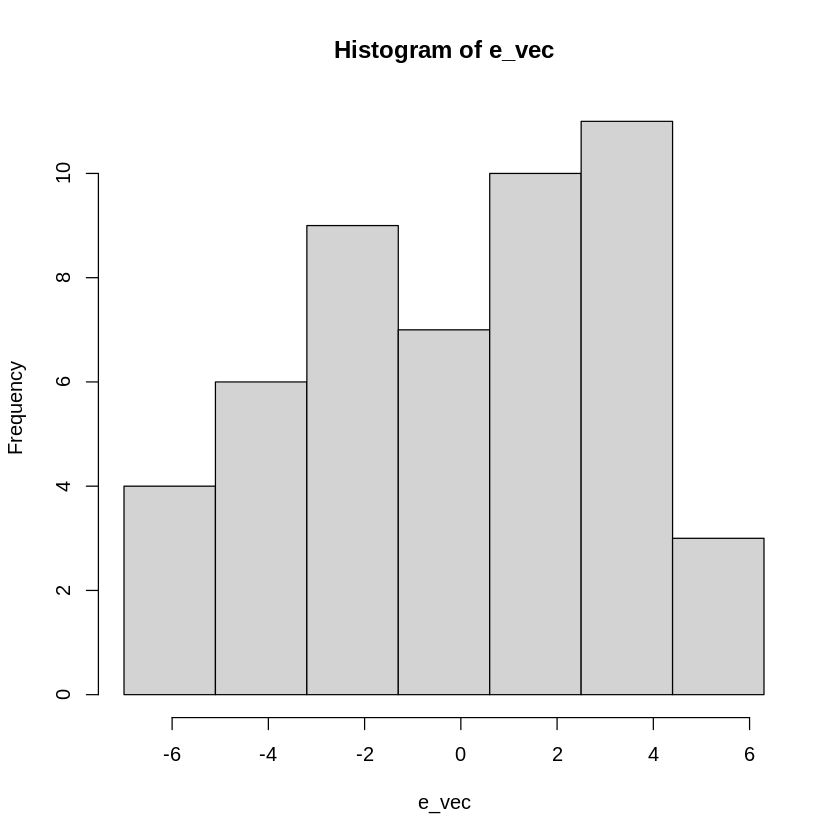

In [ ]:
e_vec <- Y - t(X) %*% beta.hat
e_vec <- sort(e_vec)
cat("Fault vector:\n", e_vec)

sigma.sq <- sum(e_vec^2)/(n-2)
cat("\n\nUnbiased estimator of variance:", sigma.sq)

breakss <- c(-7, -5.1, -3.2, -1.3, 0.6, 2.5, 4.4, 6.3)
h <- hist(e_vec, breaks = breakss)


Проверим гипотезу нормальности ошибок на уровне $\alpha$ по критерию $\chi^2$.

Гипотеза:<br> $$H_0: \varepsilon \sim 𝒩(0, \sigma^2)$$<br>

Критерий значимости
<br> $$\displaystyle \chi^2(0, \sigma) = \sum_{i=1}^r {\frac {(\nu_i - np_{0i}(0, \sigma))^2} {np_{0i}(0, \sigma)}}$$ <br>
$\nu_i$ - количество наблюдений в интервале $i$; $n$ - размер выборки; $r$ - количество интервалов на гистограмме частот.<br>
$$p_{0i} = P(\xi \in I_i) = P_0(I_i) = F_0(a_i) - F_0(a_{i-1}),\ I_i$$ - интервал на гистограмме частот, $a_i$ и $a_{i-1}$ - границы $i$-го интервала.

Критерий статистики $$\tilde{\chi^2} = \underset{(0, \sigma)}{inf}\chi^2(0, \sigma)$$

Когда верна нулевая гипотеза $\tilde{\chi^2}$ имеет распределение $\chi_{r-d-1}^2, где d$ - количество параметров распределения.


Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”




Minimal Chi.squad: 7.18036
Qantile of order 0.90: 9.236357
Comparing Chi.squad < Xalpha: TRUE

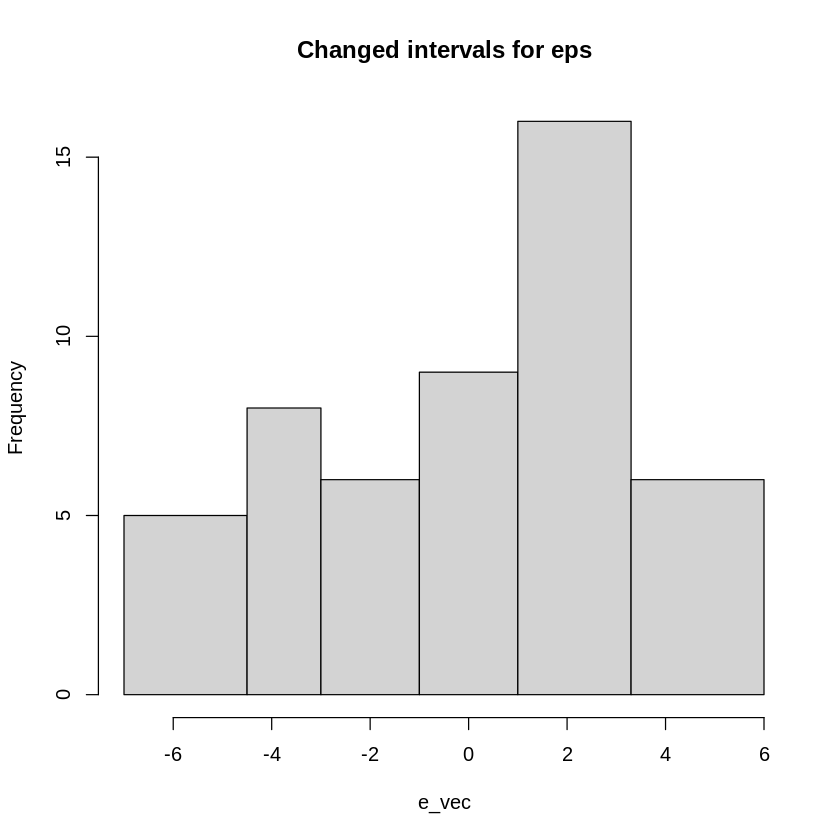

In [ ]:
breakss <- c(-7, -4.5, -3, -1, 1, 3.3, 6)
h <- hist(e_vec, breaks = breakss, freq = TRUE, main = "Changed intervals for eps")

breakss <- c(-Inf, -4.5, -3, -1, 1, 3.3, Inf)
nu <- h$counts
chi.sq <- function(sigma.sq) {
    p0 <- pnorm(breakss[2:7], 0, sigma.sq) - pnorm(breakss[1:6], 0, sigma.sq)
    return (sum ((nu - n*p0)^2 / (n*p0)))
}
Chi.sq.min <- nlm(chi.sq, sqrt(sigma.sq))$minimum
cat("\n\nMinimal Chi.squad:", Chi.sq.min)
alpha <- 0.10
X.alpha <- qchisq(1-alpha, df = length(breakss)-1-1)
cat("\nQantile of order 0.90:", X.alpha)
cat("\nComparing Chi.squad < Xalpha:", Chi.sq.min < X.alpha)

Оценка расстояния полученной оценки до класса нормальных распределений по Колмогорову.

Расстояние $$KS=\sqrt n \underset{X}{sup} |F_n(X)-F_0(X)|,$$ где $F_n$ - эмпирическая функция распределения.

Классу нормальных распределений, следовательно: $$\tilde {KS}=\underset{(0, \sigma)}{inf} {KS(0, \sigma)},$$


Рассмотрим две функции: эмпирическая функция распределения для вектора $\varepsilon$ и функция распределения для $𝒩(0, \tilde \sigma^2)$, где $\tilde \sigma^2$ - оценка полученная по Колмогорову.

Distance to class of normal distributions: 0.6266681 
Estimation: 49.19321

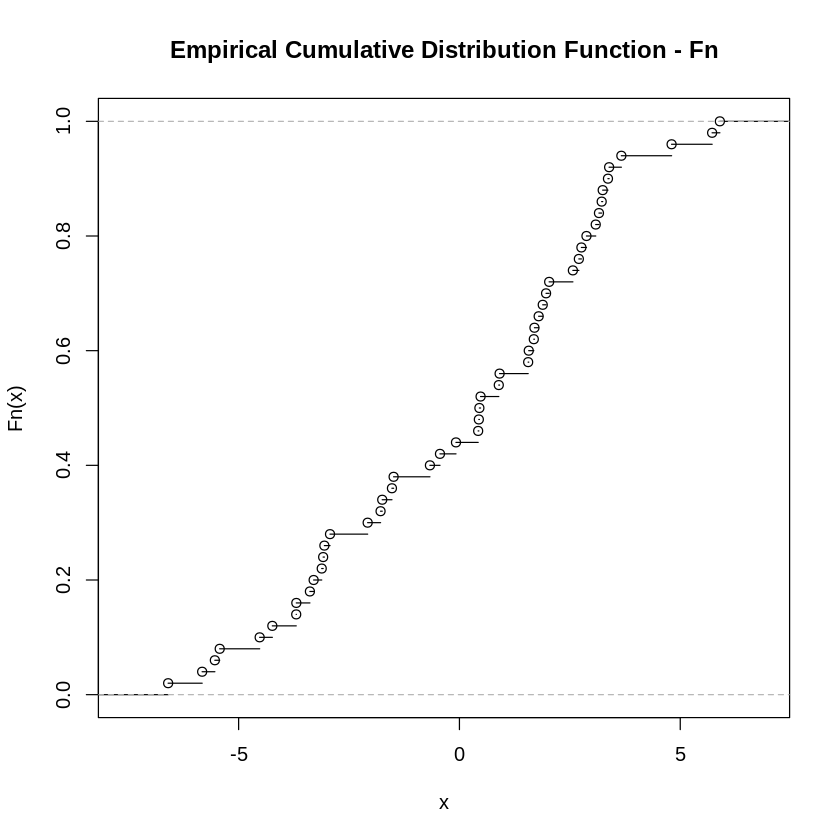

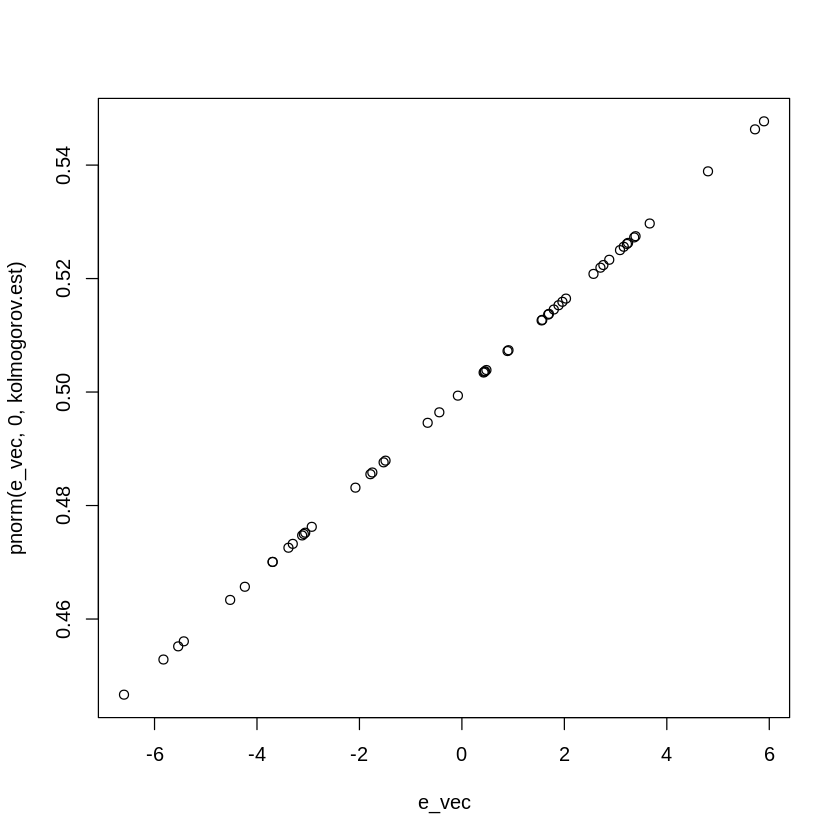

In [ ]:
kolmogorov <- function(sgm.sq){
  i.up <- (1:50)/50
  i.low <- i.up - 0.2
  lowdiff <- pnorm(sort(e_vec), 0, sgm.sq) - i.low
  updiff <- i.up <- pnorm(sort(e_vec), 0, sgm.sq)
  return(max(abs(lowdiff), abs(updiff)))
}
result <- nlm(kolmogorov, sqrt(sigma.sq))
kolmogorov.min <- result$minimum
kolmogorov.est <- result$estimate
cat("Distance to class of normal distributions:", kolmogorov.min, "\nEstimation:", kolmogorov.est)
Fn <- ecdf(e_vec)
plot(Fn, pch=1, main = "Empirical Cumulative Distribution Function - Fn")
plot(e_vec, pnorm(e_vec, 0, kolmogorov.est))

***Выводы:***
Найдена несмещенная оценка дисперсии ( $\hat \sigma^2 = 10.48881$), являющая собой отклонение от среднего. Категорий немного, а разброс значений внутри них не слишком большой большой, что и даёт такую оценку. По проверке гипотезы о нормальности ошибок (на уровне $\alpha$ по критерию $\chi^2$) выяснено, что ошибки и правда имеют нормальное распределение (уровень доверия = $\alpha$). По графику также видно, что вектор ошибок имеет норм.распределение. Оценив по Колмогорову получили, что расстояние до класса нормальных распределений: $0.6266681$,<br>
а оценка: $49.19321$.



#### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси). 

Найдём доверительные интервалы для параметров $\beta_0, \beta_1$:

$\hat \beta \sim 𝒩(\beta, \sigma^2 (XX^T)^{-1})$

$\psi = C^T\beta,\ C$ - какая-то матрица (или вектор).

$\hat \psi = C^T \hat \beta \sim 𝒩(C^T\beta, \sigma^2C^T(XX^T)^{-1}C)$

$\sigma^2C^T(XX^T)^{-1}C = var(\hat \psi) = \sigma^2 a,\ C^T \beta = \psi\ =>\ \hat \psi = C^T \hat \beta \sim 𝒩(\psi, \sigma^2 a)$

$\displaystyle \frac {\hat \psi - \psi} {\sigma \sqrt a} \sim 𝒩(0, 1),\ \frac {(n - r) S^2} {\sigma^2} \sim \chi^2_{n-r} => \frac {\hat \psi - \psi} {S \sqrt a} \sim S_{n-r}, r$ - число параметров регресии.

$\displaystyle x_\alpha: S_{n-r} (x_\alpha) = 1 - \frac \alpha 2$

$\displaystyle P\left(-x_\alpha \le \frac {\hat \psi - \psi} {S \sqrt a} \le x_\alpha\right) = P \left( \hat \psi - S x_\alpha \sqrt a  \le \psi \le \hat \psi +  S x_\alpha \sqrt a  \right) = 1 - \alpha$

$\left[ \hat \psi - S x_\alpha \sqrt a; \hat \psi +  S x_\alpha \sqrt a \right]$ - доверительный интервал для $\psi$ уровня доверия $1-\alpha$.

1. $C = \begin{pmatrix}
1\\
0
\end{pmatrix},\ \hat \psi = \hat \beta_0,\ a$ - элемент по индексу $[1,1]$ из матрицы $(XX^T)^{-1}$
2. $C = \begin{pmatrix}
0\\
1
\end{pmatrix},\ \hat \psi = \hat \beta_1,\ a$ - элемент по индексу $[2,2]$ из матрицы $(XX^T)^{-1}$

In [ ]:
# (XX^T)^-1
XXT <- solve(X %*% t(X))
x.alpha <- qt(1 - alpha/2, n-2)
leftBorder <- beta.hat[1] - sqrt(XXT[1,1]) * sqrt(sigma.sq) * x.alpha
rightBorder <- beta.hat[1] + sqrt(XXT[1,1]) * sqrt(sigma.sq) * x.alpha
cat("Confidence interval for beta0 confidence level 1-alpha: [", leftBorder, "; ", rightBorder, "]", sep = "")
leftBorder <- beta.hat[2] - sqrt(XXT[2,2]) * sqrt(sigma.sq) * x.alpha
rightBorder <- beta.hat[2] + sqrt(XXT[2,2]) * sqrt(sigma.sq) * x.alpha
cat("\nConfidence interval for beta1 confidence level 1-alpha: [", leftBorder, "; ", rightBorder, "]", sep = "")

Confidence interval for beta0 confidence level 1-alpha: [3.96442; 9.084489]
Confidence interval for beta1 confidence level 1-alpha: [0.07159145; 1.033033]

Доверительный эллипс:

$$\displaystyle (\hat \psi - \psi)^T [\sigma^2 C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) \sim \chi_q^2$$

$$\displaystyle \frac {(\hat \psi - \psi)^T [ C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) \frac 1 {q \sigma^2}} {\frac {n-r} {n-r} \cdot \frac {S^2} {\sigma^2}} = \frac {(\hat \psi - \psi)^T [ C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) } {q S^2} \sim F_{q, n-r}, r = 2, q=2$$.

$$x_\alpha: F_{q, n-r}(x_\alpha) = 1 - \alpha$$

$$\displaystyle A_\alpha = \left\{  \psi: \frac {(\hat \psi - \psi)^T [ C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) } {q S^2} \le x_\alpha \right\}$$ - доверительный эллипсоид

$$\left( \beta_1 - \hat \beta_1 \ \  \beta_0 - \hat \beta_0 \right) \begin
{pmatrix}
50 & 254\\
254 & 1418
\end{pmatrix} \begin{pmatrix}
\beta_1 - \hat \beta_1\\
\beta_0 - \hat \beta_0
\end{pmatrix} \le 4299.54070181749$$

Собственные числа матрицы: $1463.638267, 4.361733$

$$1463.638267(\beta_1 - 0.552312)^2 + 6.503149(\beta_0+6.524455)^2 \le 4299.54070181749$$

$$\displaystyle \frac {(\beta_1 - 0.552312)^2} {0.3404174} + \frac {(\beta_0+6.524455)^2} {0.001014465} \le 1$$

Полуоси доверительного эллипса: $0.3404174, 0.001014465$


In [ ]:
x.alpha <- qt(1-alpha, 2, n-2)
C <- matrix(c(1, 1), 2, 2)
C[1,2] <- 0
C[2,1] <- 0
C
cat("\n\n")

# [C^T(XX^T)^-1C]^-1
CTXXTC <- solve(t(C) %*% solve(X %*% t(X)) %*% C)
CTXXTC
cat("\n\n")

# x.alpha * q * sigma.sq
xalph.q.S2 <- x.alpha * 2 * sigma.sq
xalph.q.S2
cat("\n\n")
decomp <- eigen(CTXXTC)
decomp
semiaxis1 <- decomp$values[1] / xalph.q.S2
semiaxis2 <- decomp$values[2] / xalph.q.S2
cat("\n\nSemiaxis: ", semiaxis1, ", ", semiaxis2, sep = "")

1,0
0,1


50,254
254,1418


[1] 4299.541

eigen() decomposition
$values
[1] 1463.638267    4.361733

$vectors
          [,1]       [,2]
[1,] 0.1768462 -0.9842385
[2,] 0.9842385  0.1768462




Semiaxis: 0.3404174, 0.001014465

***Выводы:***
Построены доверительные интервалы:<br>
Доверительный интервал для 

$\beta_0$ уровня доверия $1-\alpha$: $[3.96442; 9.084489]$<br>


$\beta_1$ уровня доверия $1-\alpha$: $[0.07159145; 1.033033]$<br>
Найденные выше $\hat\beta_0=6.524455, \ \hat\beta_1=0.552312$ лежат в этих интервалах.

Построен доверительный эллипс. Все возможные значения  $\psi$ лежат внутри него.


#### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $x$. Провести проверку значимости.

$$\psi = C^T\beta$$

$$\hat \psi = C^T \hat \beta \sim 𝒩(C^T\beta, \sigma^2C^T(XX^T)^{-1}C)$$

Сформулируем гипотезу: $H_0: \psi = 0$

Статистика $F$-критерия:

$$\displaystyle 𝔽 = \frac {\hat \psi^T(C^T(XX^T)^{-1}C)^{-1}\hat \psi} {qS^2} \sim F_{q,n-r},\ q=1,\ r=2$$

$$C=\begin {pmatrix}
0\\
1
\end{pmatrix},\ \hat \psi = \hat \beta_1$$, исследуемая независимость - $Y(x)$.


In [ ]:
# матрица C
C <- matrix(c(0,1), 2, 1)
cat(C,"\n\n")
x.alpha <- qf(1-alpha, 1, n-2)
cat("Order quantile alpha=0.9:", x.alpha, "\n\n")
#[C^T(XX^T)^-1C]^-1
CTXXTC <- solve(t(C) %*% solve(X %*% t(X)) %*% C)
CTXXTC
cat("\n\n")
beta.hat2 <- t(C) %*% beta.hat
beta.hat2
F.criterion <- t(beta.hat2) %*% CTXXTC %*% beta.hat2 / (2*sigma.sq)
cat("\n\nStatistics F-criterion:", F.criterion)
cat("\n\nComparing F.criterion < Xalpha:", F.criterion < X.alpha)


0 1 

Order quantile alpha=0.9: 2.813081 



127.68


0.552312




Statistics F-criterion: 1.856675

Comparing F.criterion < Xalpha: TRUE

p-value - максимальный уровень значимости.
$$p-value = 1-F_0(𝔽)$$


In [ ]:
p.value <- 1 - pt(F.criterion,n-2)
cat("Maximum significance level:", p.value)

Maximum significance level: 0.03475011

***Выводы:***

Сформирована и проверена гипотеза независимости $Y$ от $x$. Так как значение статистики $F$-критерия оказалось меньше, чем квантиль порядка $\alpha=0.10$, то нулевая гипотеза принимается.

#### 5. Сформулировать модель, включающую дополнительный член с $x^2$. Построить МНК для параметров $\beta_0, \beta_1, \beta_2$ и данной модели. Изобразить графически полученную регрессионную зависимость.


 $Y$ и $x$ - векторы данных.  
 Рассмотрим зависимость $Y$ от $x$. Для этого выведем график результата эксперимента методом $plot(x, Y)$.

Рассмотрим линейную регрессионую модель $Y$ по $x$:<br>

Оценим среднее (распредление $Y$ от $x$): 

$$\displaystyle 𝔼_\theta(Y|x) = X^T(x)\beta\ и\ 𝔻(Y|x) = \sigma^2\ <=>\ Y = X^T(x)\beta +\varepsilon,\ \varepsilon \sim 𝒩(0, \sigma^2)$$

$$\begin{matrix}
\displaystyle Y_1 = \beta_0+\beta_1x_1 + \beta_2x_1^2 + \varepsilon_1;\\
\displaystyle Y_2 = \beta_0+\beta_1x_2 + \beta_2x_2^2 + \varepsilon_2;\\
...\\
\displaystyle Y_n = \beta_0+\beta_1x_n + \beta_2x_n^2 + \varepsilon_n
\end{matrix} <=>
\begin{pmatrix}
Y_1\\
Y_2\\
\vdots\\
Y_n
\end{pmatrix} = \begin{pmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
\vdots & \vdots & \vdots\\
1 & x_n & x_n^2
\end{pmatrix} \begin{pmatrix}
\beta_0\\
\beta_1\\
\beta_2
\end{pmatrix} + \begin{pmatrix}
\varepsilon_1\\
\varepsilon_2\\
\vdots\\
\varepsilon_n
\end{pmatrix},\\где\ X = \begin{pmatrix}
1 & 1 & \cdots & 1\\
x_1 & x_2 & \cdots & x_n \\
x_1^2 & x_2^2 & \cdots & x_n^2 
\end{pmatrix} - матрица\ регрессоров.$$

тобы создать матрицу регрессоров к вектору $x$ добавим колонку "1" и протранспонируем, получив матрицу $X$.

Чтобы создать линейную модель воспользуемся методом $lm(Y \sim x)$

Построим МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.

Оценка по МНК для параметров необходима, чтобы оценить, гасколько коварианты оказывают влияние на рассматриваемую случ.величину: 

$$\hat \beta = (XX^T)^{-1}XY$$

Подставим полученные значения $\hat \beta_0, \hat \beta_1$.


Вывод: была построена линия регрессии.

beta0, beta1, beta2:



Call:
lm(formula = Y ~ x + x.2)

Coefficients:
(Intercept)            x          x.2  
      9.729       -1.106        0.184  



beta0, beta1, beta2  obtained through evaluation by Least Square Method:



,9.728750
x,-1.105511
,0.183972


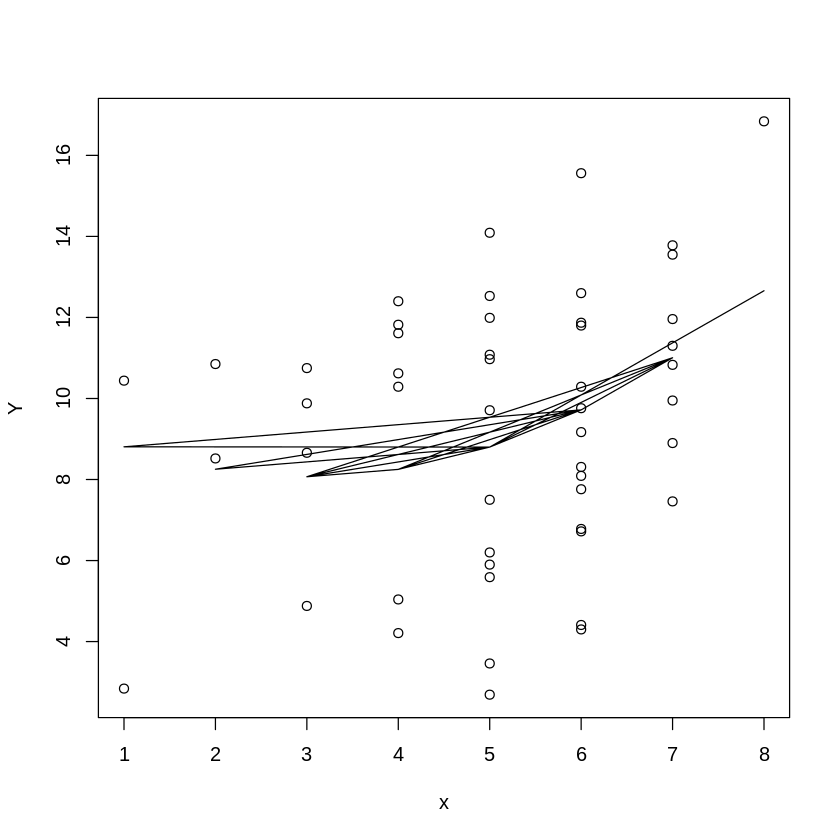

In [ ]:
plot(x, Y)
X <- rbind(t(cbind(1,x)), x^2)
x.2 <- x^2
model <- lm(Y ~ x+x.2)
cat("beta0, beta1, beta2:\n")
model
beta.hat <- solve(X %*% t(X)) %*% X %*% Y
cat("\nbeta0, beta1, beta2  obtained through evaluation by Least Square Method:\n\n")
beta.hat
Y.pred <- beta.hat[1] + beta.hat[2]*x + beta.hat[3]*x^2
lines(x, Y.pred)

***Выводы:***
В ркзультате, значения $\beta_0,\ \beta_1\ и\ \beta_2$ полученные с помощью функции $lm()$ и с помощью оценки по МНК совпали.Следовательно, оценка подобрана хорошо. Из графика видно, что при любом  $x_i$ соответствующее значение $Y_i$ приблизительно является средним. Следовательно, модель линейной регрессии построена хорошо.


#### 6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в п. 3.

Вектор ошибок: $$\displaystyle \varepsilon = Y - X^T(x)\hat \beta = \sum_{i=1}^n (Y_i-\hat\beta_0-\hat\beta_1x_i-\hat\beta_2x_i^2)$$

Несмещенная оценка дисперсии: $$\displaystyle \hat {\sigma^2} = S^2 = \frac 1 {n-r} \left\| Y-X^T(x) \hat\beta \right\| = \frac 1 {n-r} \sum_{i=1}^n (Y_i-\hat\beta_0-\hat\beta_1x_i-\hat\beta_2x_i^2)^2$$, $n$ - длина вектора $Y$, $r$ - число параметров регрессии ($r=3$).

Построим гистограмму (шаг = 1.90) на базе вектора ошибок.



Fault vector:
 -6.110495 -5.967211 -5.418676 -5.340495 -5.308676 -4.040258 -3.544801 -3.210495 -3.210258 -3.187965 -2.998676 -2.938676 -2.900495 -2.600495 -2.104801 -1.958676 -1.628676 -1.408676 -1.300495 -1.054801 -0.5486761 -0.1748013 0.04132391 0.2663844 0.2951987 0.5713239 0.5920354 0.9095051 0.9551987 1.632789 1.812035 2.039742 2.081324 2.151324 2.169505 2.279505 2.369742 2.545199 2.596384 2.682035 2.775199 2.881324 3.189505 3.359742 3.569742 3.729505 4.149742 4.181129 5.289505 5.841324

Unbiased estimator of variance: 10.12531

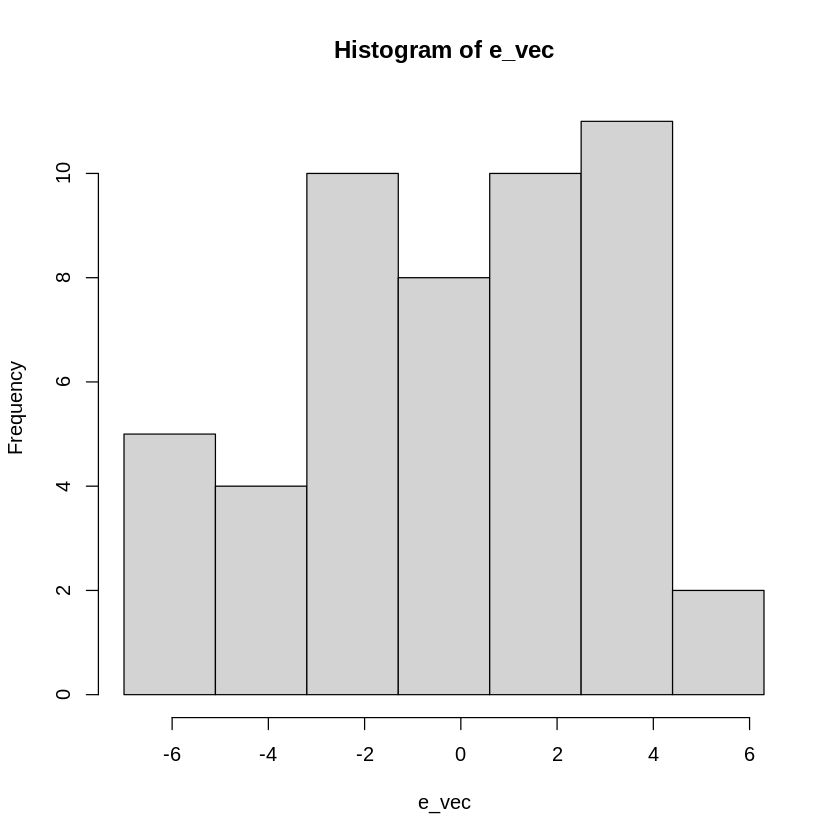

In [ ]:
e_vec <- Y - t(X) %*% beta.hat
e_vec <- sort(e_vec)
cat("Fault vector:\n", e_vec)

sigma.sq <- sum(e_vec^2)/(n-2)
cat("\n\nUnbiased estimator of variance:", sigma.sq)

breakss <- c(-7, -5.1, -3.2, -1.3, 0.6, 2.5, 4.4, 6.3)
h <- hist(e_vec, breaks = breakss)

Проверена гипотеза нормальности ошибок на уровне $\alpha$ по критерию $\chi^2$.

$$H_0: \varepsilon \sim 𝒩(0, \sigma^2)$$<br>

Критерий значимости
$$\displaystyle \chi^2(0, \sigma) = \sum_{i=1}^r {\frac {(\nu_i - np_{0i}(0, \sigma))^2} {np_{0i}(0, \sigma)}}$$ <br>
$\nu_i$ - количество наблюдений в интервале $i$; $n$ - размер выборки; $r$ - количество интервалов на гистограмме частот.<br>
$p_{0i} = P(\xi \in I_i) = P_0(I_i) = F_0(a_i) - F_0(a_{i-1}),\ I_i$ - интервал на гистограмме частот, $a_i$ и $a_{i-1}$ - границы $i$-го интервала.

Критерий статистики $$\tilde{\chi^2} = \underset{(0, \sigma)}{inf}\chi^2(0, \sigma)$$

Когда нулевая гипотеза верна, $\tilde{\chi^2}$ имеет распределение $\chi_{r-d-1}^2, d$ - количество параметров распределения.

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”




Minimal Chi.squad: 1.668903
Qantile of order 0.90: 9.236357
Comparing Chi.squad < Xalpha: TRUE

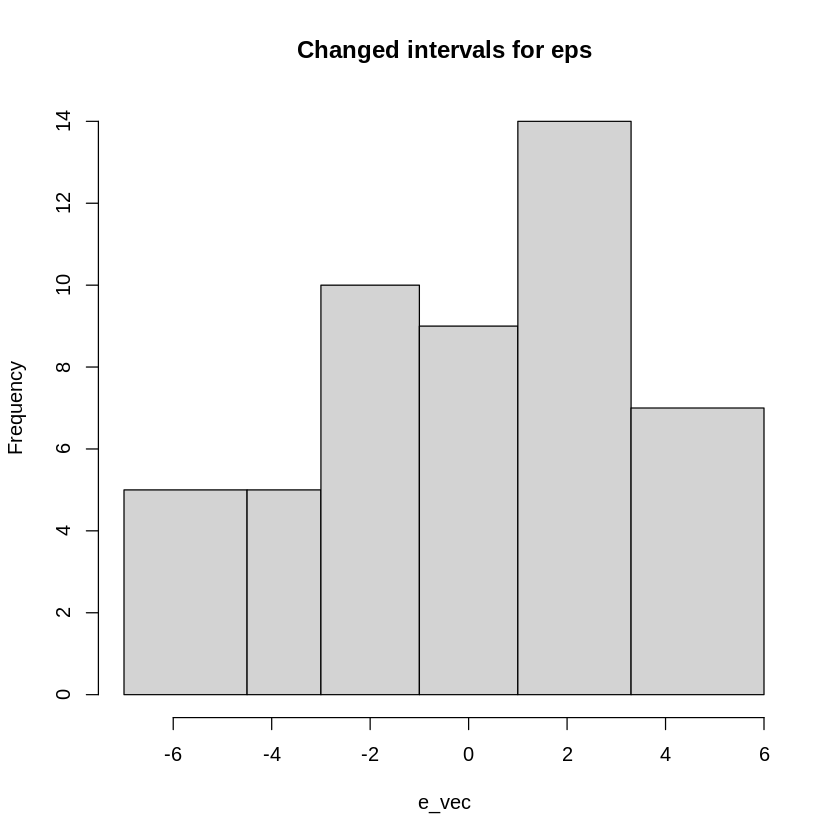

In [ ]:
breakss <- c(-7, -4.5, -3, -1, 1, 3.3, 6)
h <- hist(e_vec, breaks = breakss, freq = TRUE, main = "Changed intervals for eps")

breakss <- c(-Inf, -4.5, -3, -1, 1, 3.3, Inf)
nu <- h$counts
chi.sq <- function(sigma.sq) {
    p0 <- pnorm(breakss[2:7], 0, sigma.sq) - pnorm(breakss[1:6], 0, sigma.sq)
    return (sum ((nu - n*p0)^2 / (n*p0)))
}
Chi.sq.min <- nlm(chi.sq, sqrt(sigma.sq))$minimum
cat("\n\nMinimal Chi.squad:", Chi.sq.min)
alpha <- 0.10
X.alpha <- qchisq(1-alpha, df = length(breakss)-1-1)
cat("\nQantile of order 0.90:", X.alpha)
cat("\nComparing Chi.squad < Xalpha:", Chi.sq.min < X.alpha)

Оценка расстояния полученной оценки до класса нормальных распределений по Колмогорову.

Расстояние $$KS=\sqrt n \underset{X}{sup} |F_n(X)-F_0(X)|,$$ где $F_n$ - эмпирическая функция распределения.

Классу нормальных распределений, следовательно: $$\tilde {KS}=\underset{(0, \sigma)}{inf} {KS(0, \sigma)},$$


Рассмотрим две функции: эмпирическая функция распределения для вектора $\varepsilon$ и функция распределения для $𝒩(0, \tilde \sigma^2)$, где $\tilde \sigma^2$ - оценка полученная по Колмогорову.

Distance to class of normal distributions: 0.6603462 
Estimation: 123.9835

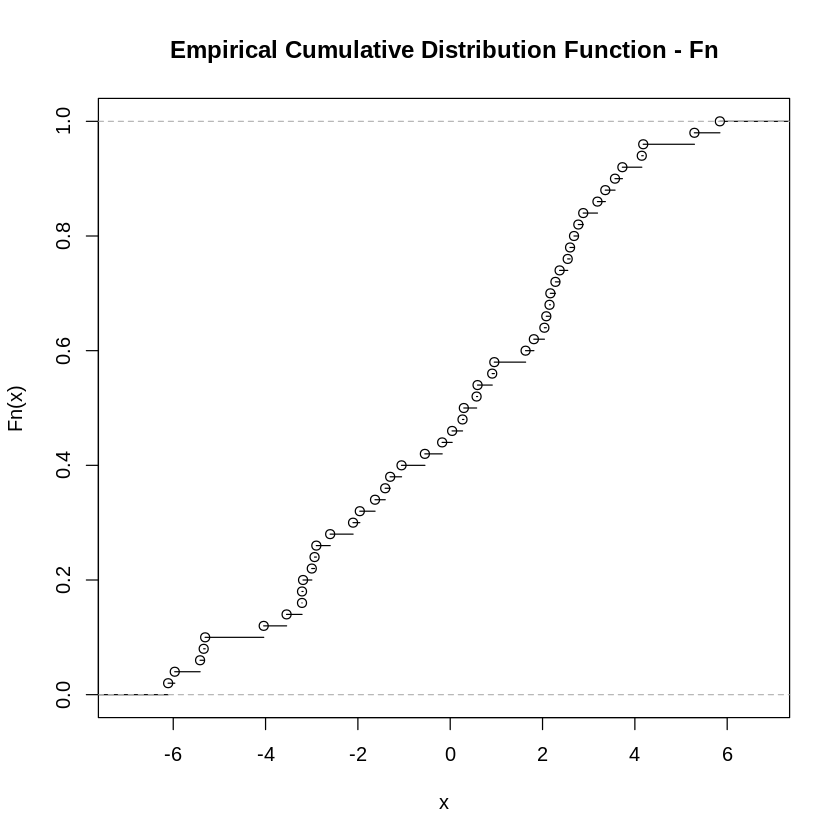

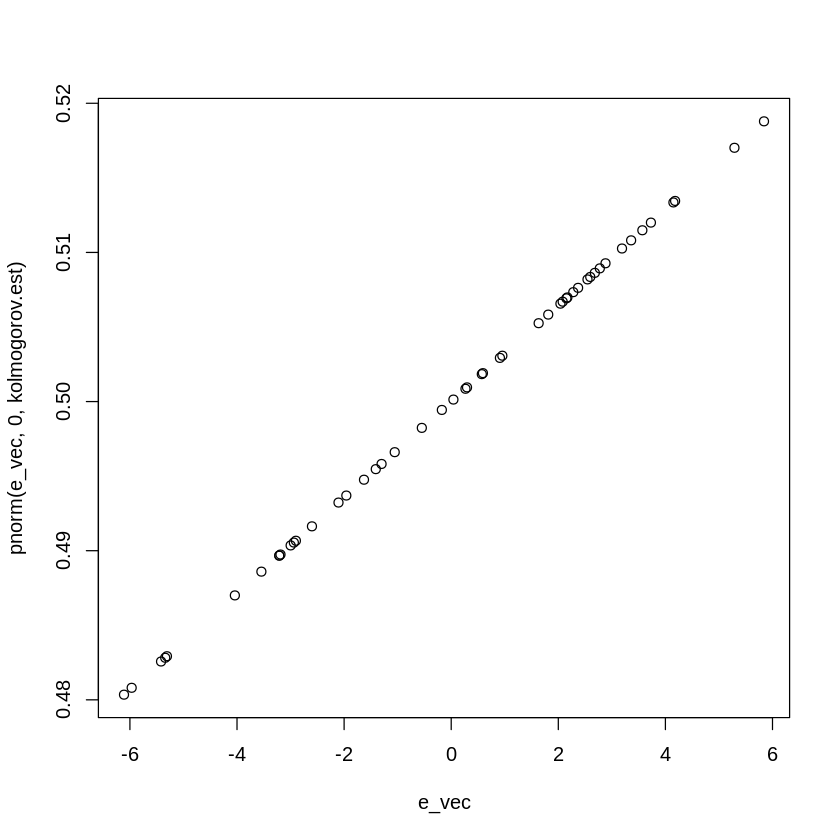

In [ ]:
kolmogorov <- function(sgm.sq){
  i.up <- (1:50)/50
  i.low <- i.up - 0.2
  lowdiff <- pnorm(sort(e_vec), 0, sgm.sq) - i.low
  updiff <- i.up <- pnorm(sort(e_vec), 0, sgm.sq)
  return(max(abs(lowdiff), abs(updiff)))
}
result <- nlm(kolmogorov, sqrt(sigma.sq))
kolmogorov.min <- result$minimum
kolmogorov.est <- result$estimate
cat("Distance to class of normal distributions:", kolmogorov.min, "\nEstimation:", kolmogorov.est)
Fn <- ecdf(e_vec)
plot(Fn, pch=1, main = "Empirical Cumulative Distribution Function - Fn")
plot(e_vec, pnorm(e_vec, 0, kolmogorov.est))

***Выводы:***
Найдена несмещенная оценка дисперсии ( $\hat \sigma^2 = 10.12531$), являющая собой отклонение от среднего. Категорий немного, а разброс значений внутри них не слишком большой большой, что и даёт такую оценку. По проверке гипотезы о нормальности ошибок (на уровне $\alpha$ по критерию $\chi^2$) выяснено, что ошибки и правда имеют нормальное распределение (уровень доверия = $\alpha$). По графику также видно, что вектор ошибок имеет норм.распределение. Оценив по Колмогорову получили, что расстояние до класса нормальных распределений: $0.6603462 $,<br>
а оценка: $123.9835$.



#### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

Вычислим доверительные интервалы для параметров $\beta_0, \beta_1$:

$$\hat \beta \sim 𝒩(\beta, \sigma^2 (XX^T)^{-1})$$

$$\psi = C^T\beta$$

$$\hat \psi = C^T \hat \beta \sim 𝒩(C^T\beta, \sigma^2C^T(XX^T)^{-1}C)$$

$$\sigma^2C^T(XX^T)^{-1}C = var(\hat \psi) = \sigma^2 a,\ C^T \beta = \psi\ =>\ \hat \psi = C^T \hat \beta \sim 𝒩(\psi, \sigma^2 a)$$

$$\displaystyle \frac {\hat \psi - \psi} {\sigma \sqrt a} \sim 𝒩(0, 1),\ \frac {(n - r) S^2} {\sigma^2} \sim \chi^2_{n-r} => \frac {\hat \psi - \psi} {S \sqrt a} \sim S_{n-r}, r$$ - число параметров регресии.

$$\displaystyle x_\alpha: S_{n-r} (x_\alpha) = 1 - \frac \alpha 2$$

$$\displaystyle P\left(-x_\alpha \le \frac {\hat \psi - \psi} {S \sqrt a} \le x_\alpha\right) = P \left( \hat \psi - S x_\alpha \sqrt a  \le \psi \le \hat \psi +  S x_\alpha \sqrt a  \right) = 1 - \alpha$$

$$\left[ \hat \psi - S x_\alpha \sqrt a; \hat \psi +  S x_\alpha \sqrt a \right]$$ - доверительный интервал для $\psi$ уровня доверия $1-\alpha$.

1. $$C = \begin{pmatrix}
1\\
0\\
0
\end{pmatrix},\ \hat \psi = \hat \beta_0,\ a$$ - элемент по индексу $[1,1]$ из матрицы $(XX^T)^{-1}$
2. $$C = \begin{pmatrix}
0\\
1\\
0
\end{pmatrix},\ \hat \psi = \hat \beta_1,\ a$$ - элемент по индексу $[2,2]$ из матрицы $(XX^T)^{-1}$

3. $$C = \begin{pmatrix}
0\\
0\\
1
\end{pmatrix},\ \hat \psi = \hat \beta_2,\ a$$ - элемент по индексу $[3,3]$ из матрицы $(XX^T)^{-1}$

In [ ]:
# (XX^T)^-1
XXT <- solve(X %*% t(X))
x.alpha <- qt(1 - alpha/2, n-3)
leftBorder <- beta.hat[1] - sqrt(XXT[1,1]) * sqrt(sigma.sq) * x.alpha
rightBorder <- beta.hat[1] + sqrt(XXT[1,1]) * sqrt(sigma.sq) * x.alpha
cat("Confidence interval for beta0 confidence level 1-alpha: [", leftBorder, "; ", rightBorder, "]", sep = "")
leftBorder <- beta.hat[2] - sqrt(XXT[2,2]) * sqrt(sigma.sq) * x.alpha
rightBorder <- beta.hat[2] + sqrt(XXT[2,2]) * sqrt(sigma.sq) * x.alpha
cat("\nConfidence interval for beta1 confidence level 1-alpha: [", leftBorder, "; ", rightBorder, "]", sep = "")
leftBorder <- beta.hat[3] - sqrt(XXT[3,3]) * sqrt(sigma.sq) * x.alpha
rightBorder <- beta.hat[3] + sqrt(XXT[3,3]) * sqrt(sigma.sq) * x.alpha
cat("\nConfidence interval for beta2 confidence level 1-alpha: [", leftBorder, "; ", rightBorder, "]", sep = "")

Confidence interval for beta0 confidence level 1-alpha: [4.921694; 14.53581]
Confidence interval for beta1 confidence level 1-alpha: [-3.276635; 1.065613]
Confidence interval for beta2 confidence level 1-alpha: [-0.05118683; 0.4191309]

Доверительный эллипс:

$$\displaystyle (\hat \psi - \psi)^T [\sigma^2 C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) \sim \chi_q^2$$

$$\displaystyle \frac {(\hat \psi - \psi)^T [ C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) \frac 1 {q \sigma^2}} {\frac {n-r} {n-r} \cdot \frac {S^2} {\sigma^2}} = \frac {(\hat \psi - \psi)^T [ C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) } {q S^2} \sim F_{q, n-r}, r = 3, q=3$$.

$$x_\alpha: F_{q, n-r}(x_\alpha) = 1 - \alpha$$

$$\displaystyle A_\alpha = \left\{  \psi: \frac {(\hat \psi - \psi)^T [ C^T (XX^T)^{-1}C]^{-1} (\hat \psi - \psi) } {q S^2} \le x_\alpha \right\}$$ - доверительный эллипсоид

Уравнение:

$$\left( \beta_2 - \hat \beta_2\ \ \beta_1 - \hat \beta_1 \ \  \beta_0 - \hat \beta_0 \right) \begin
{pmatrix}
50	& 254 &	1418\\
254	& 1418 &	8354\\
1418 &	8354	& 51098
\end{pmatrix} \begin{pmatrix}
\beta_2 - \hat \beta_2\\
\beta_1 - \hat \beta_1\\
\beta_0 - \hat \beta_0
\end{pmatrix} \le 119.4818$$

In [ ]:
x.alpha <- qt(1-alpha, 3, n-3)
cat(x.alpha,"\n\n")

C <- cbind(c(1, 0, 0), c(0, 1, 0), c(0, 0, 1))

# [C^T(XX^T)^-1C]^-1
CTXXTC <- solve(t(C) %*% solve(X %*% t(X)) %*% C)
CTXXTC
cat("\n\n")

119.4818 



50,254,1418
254,1418,8354
1418,8354,51098


***Выводы:***

* Были построены довериельные интервалы:<br>
Доверительный интервал для $\beta_0$ уровня доверия $1-\alpha$: $[4.921694; 14.53581]$<br>
Доверительный интервал для $\beta_1$ уровня доверия $1-\alpha$: $[-3.276635; 1.065613]$<br>
Доверительный интервал для $\beta_1$ уровня доверия $1-\alpha$: $[-0.05118683; 0.4191309]$<br>
Найденные выше $\hat\beta_0=9.728750, \ \hat\beta_1=-1.105511, \ \hat\beta_2=0.183972$ лежат в этих интервалах.
Построен доверительный эллипс. Все возможные значения  $\psi$ лежат внутри него.


#### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $x$ и проверить ее значимость на уровне $\alpha$.

$$\psi = C^T\beta.$$

$$\hat \psi = C^T \hat \beta \sim 𝒩(C^T\beta, \sigma^2C^T(XX^T)^{-1}C)$$

Гипотеза: $$H_0: \psi = 0$$

Статистика $F$-критерия:

$$\displaystyle 𝔽 = \frac {\hat \psi^T(C^T(XX^T)^{-1}C)^{-1}\hat \psi} {qS^2} \sim F_{q,n-r},\ q=1,\ r=3$$

$C=\begin {pmatrix}
0&0\\
1&0\\
0&1\\
\end{pmatrix},\ \hat \psi = \begin
{pmatrix}
\hat \beta_1\\
\hat \beta_2
\end{pmatrix}$,  зависимость $Y(x)$.

In [ ]:
C <- matrix(c(0,0,1))
x.alpha <- qf(1-alpha, 1, n-3)
cat("Order quantile alpha alpha=0.9:", x.alpha, "\n\n")
# [C^T(XX^T)^-1C]^-1
CTXXTC <- solve(t(C) %*% solve(X %*% t(X)) %*% C)
CTXXTC
cat("\n\n")
beta.hat3 <- t(C) %*% beta.hat
beta.hat3
F.criterion <- t(beta.hat3) %*% CTXXTC %*% beta.hat3 / (2*sigma.sq)
cat("\n\nStatistics F-criterion:", F.criterion)
cat("\n\nComparing F.criterion < Xalpha:", F.criterion < X.alpha)


Order quantile alpha alpha=0.9: 2.815438 



515.5038


0.183972




Statistics F-criterion: 0.8615825

Comparing F.criterion < Xalpha: TRUE


p-value - максимальный уровень значимости.
$$1-F_0(𝔽)$$

In [ ]:
p.value <- 1 - pt(F.criterion,n-3)
cat("Maximum significance level:", p.value)

Maximum significance level: 0.1966459

***Выводы:***

Сформирована и проверена гипотеза независимости $Y$ от $x$. Так как значение статистики $F$-критерия оказалось меньше, чем квантиль порядка $\alpha=0.10$, то нулевая гипотеза принимается.